In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

from blg_strain.bands import get_bands
from blg_strain.berry import berry_mu, berry_connection, berry_from_connection
from blg_strain.utils.utils import get_splines
from blg_strain.utils.utils import densify
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import D_valley, ntot_func, D_func, n_valley, M_valley

In [34]:
%matplotlib notebook

In [35]:
delta = 0.01
Delta = 0.01

kx, ky, Kx, Ky, E, Psi = get_bands(Nkx=200, Nky=200, Delta=Delta, delta=delta, twobytwo=True)
Omega, Mu = berry_mu(Kx, Ky, E, Psi)
splE, splO, splM = get_splines(kx, ky, E, Omega, Mu)
kx2, ky2, E2, Omega2, Mu2 = densify(kx, ky, splE, splO, splM)

In [36]:
EF = 0.015
T = 0

f = feq_func(E2, EF, T)
M = M_valley(kx2, ky2, f, splE, splO, splM, Efield=[1,0], tau=.1, EF=EF)

<IPython.core.display.Javascript object>


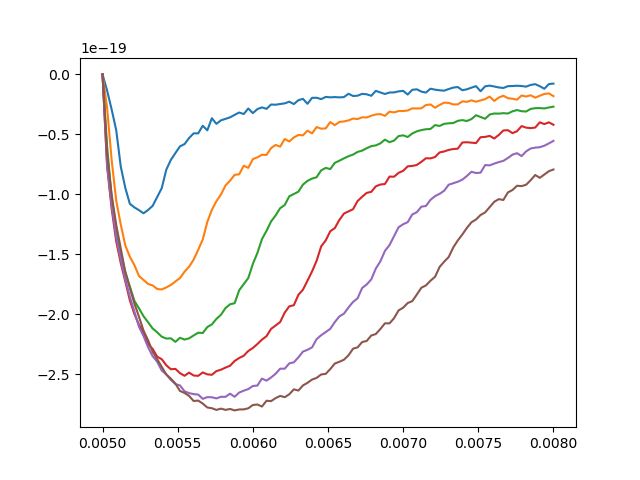

In [37]:
EFs = np.linspace(0.005,0.008, 100)
deltas = [.001, .002, .003, 0.004, 0.005, 0.006]
Ms = np.empty_like(EFs)

fig, ax = plt.subplots()

for delta in deltas:
    kx, ky, Kx, Ky, E, Psi = get_bands(Nkx=200, Nky=200, Delta=Delta, delta=delta, twobytwo=True)
    Omega, Mu = berry_mu(Kx, Ky, E, Psi)
    splE, splO, splM = get_splines(kx, ky, E, Omega, Mu)
    kx2, ky2, E2, Omega2, Mu2 = densify(kx, ky, splE, splO, splM)
    
    for i, EF in enumerate(EFs):
        f = feq_func(E2, EF, T)
        Ms[i] = M_valley(kx2, ky2, f, splE, splO, splM, Efield=[1,0], tau=.1, EF=EF)

    ax.plot(EFs, Ms)

In [18]:
feq_func(E2, 0.01, 0).any()

True

# Carrier density and displacement field

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

from blg_strain.bands import get_bands
from blg_strain.berry import berry_mu, berry_connection, berry_from_connection
from blg_strain.utils.utils import get_splines
from blg_strain.utils.utils import densify
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import *

In [5]:
delta = 0.01
Delta = 0.01

kx, ky, Kx, Ky, E, Psi = get_bands(Nkx=200, Nky=200, Delta=Delta, delta=delta)
Omega, Mu = berry_mu(Kx, Ky, E, Psi)
splE, splO, splM = get_splines(kx, ky, E, Omega, Mu)
kx2, ky2, E2, Omega2, Mu2 = densify(kx, ky, splE, splO, splM)

kxp, kyp, Kxp, Kyp, Ep, Psip = get_bands(Nkx=200, Nky=200, xi=1, Delta=Delta, delta=delta)
Omegap, Mup = berry_mu(Kxp, Kyp, Ep, Psip)
splEp, splOp, splMp = get_splines(kxp, kyp, Ep, Omegap, Mup)
kx2p, ky2p, E2p, Omega2p, Mu2p = densify(kxp, kyp, splEp, splOp, splMp)

In [6]:
EF = 0.01
T = 0

feq1 = feq_func(E, EF, T)
feq2 = feq_func(Ep, EF, T)

n1 = n_layer(kx, ky, feq1, feq2, Psi, Psip, layer=1)
n2 = n_layer(kx, ky, feq1, feq2, Psi, Psip, layer=2)

disp_field(Delta, n1, n2)

75.0310479189432

In [7]:
n1, n2

(715275048826308.1, 3236356013821551.0)

# Object oriented

In [38]:
class Bands():
    def __init__(self, **kwargs):
        self.kx, self.ky, self.Kx, self.Ky, self.E, self.Psi = get_bands(**kwargs)
        self.Omega, self.Mu = berry_mu(self.Kx, self.Ky, self.E, self.Psi)
        self.splE, self.splO, self.splM = get_splines(kx, ky, E, Omega, Mu)
        kx2, ky2, E2, Omega2, Mu2 = densify(kx, ky, splE, splO, splM)

In [39]:
b = Bands()

In [42]:
from blg_strain.valley import Valley

In [43]:
v1 = Valley(xi=1)
v2 = Valley(xi=-1)

In [46]:
v1.calculate()

In [22]:
v2.calculate()

In [10]:
from blg_strain.classes import *
from blg_strain.microscopic import feq_func

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [28]:
bs1 = BandStructure(xi=1, delta=0.001, Delta=0.01)
bs2 = BandStructure(xi=-1, delta=0.001, Delta=0.01)

In [29]:
bs1.calculate()
bs2.calculate()

In [40]:
EFs = np.linspace(0.005,0.008, 10)
T=0

M1 = np.empty_like(EFs)
M2 = np.empty_like(EFs)

    
for i, EF in enumerate(EFs):
    for M, bs in zip([M1, M2], [bs1, bs2]):
        f = feq_func(bs.E, EF, T)
        M[i] = M_valley(bs.kx, bs.ky, f, bs.splE, bs.splO, bs.splM, Efield=[0,1], tau=.1, EF=EF)

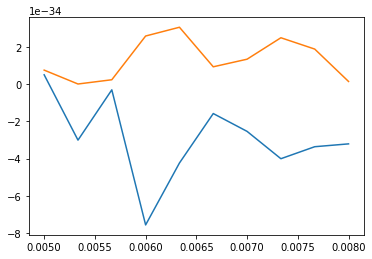

In [41]:
fig, ax = plt.subplots()
ax.plot(EFs, M1)
ax.plot(EFs, -M2)